In [1]:
import cv2
import numpy as np

from algorithms import BFS
from utils import imshow, crop

(147, 220, 3)


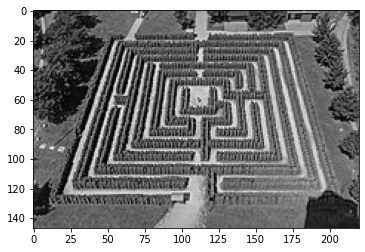

In [2]:
image_rgb = cv2.imread('images/maze_1.jpg', cv2.IMREAD_COLOR)
print(image_rgb.shape)

image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
imshow(image, cmap='gray')

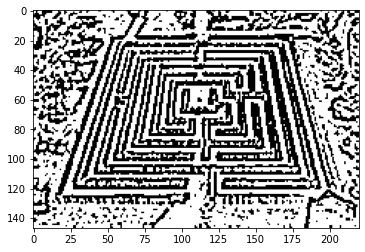

In [3]:
kernel_side = 5
kernel = (kernel_side, kernel_side)
stddev = 1.0

thresholded = cv2.GaussianBlur(image, kernel, stddev)

thresholded = cv2.adaptiveThreshold(
    thresholded,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=kernel_side,
    C=2
)

imshow(thresholded, cmap='gray')

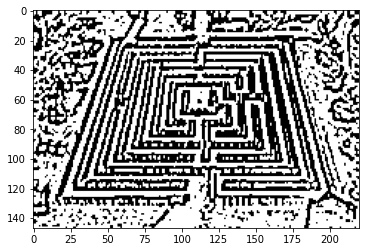

In [4]:
thresholded = cv2.erode(thresholded, kernel)
thresholded = cv2.dilate(thresholded, kernel)

imshow(thresholded, cmap='gray')

(115, 147)


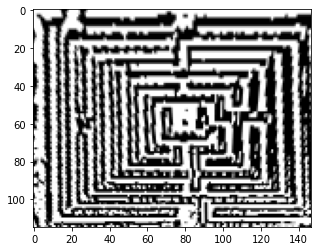

True

In [5]:
cropped = crop(thresholded, np.float32([[50, 15], [175, 15], [5, 130], [205, 130]]))
print(cropped.shape)
imshow(cropped, cmap='gray')

Solution has been found!


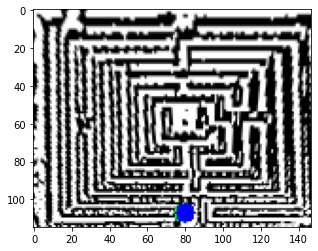

In [8]:
start = 107, 79
finish = 107, 80

bfs = BFS(cropped, start=start, finish=finish)
bfs.solve()
imshow(bfs.draw(cv2.cvtColor(cropped, cv2.COLOR_GRAY2RGB), thickness=5))
